## Simple CNN for Edgelovers


In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

![](ch02_2.20_kernel.png)

### a)  Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have no more than 30 trainable parameters in the network. 
* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.


### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use `model.get_weights()`. Does the learned kernel makes sense?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## a) Generation of the data

In [3]:
def generateImage(n_lines, shape, line_length, horizontal):
    img = np.full((shape, shape), 255)

    for i in range(n_lines):

        def generateHorizontalLine():
            random_point = (np.random.randint(shape), np.random.randint(shape-line_length))

            # check for collision
            for j in range(random_point[1], random_point[1]+line_length):
                if img[random_point[0], j] < 255:
                    return False # line exists
            
            # draw line
            for j in range(random_point[1], random_point[1]+line_length):
                img[random_point[0], j] = 0
            
            return True

        def generateVerticalLine():
            random_point = (np.random.randint(shape-line_length), np.random.randint(shape))

            # check for collision
            for j in range(random_point[0], random_point[0]+line_length):
                if img[j, random_point[1]] < 255:
                    return False # line exists
            
            # draw line
            for j in range(random_point[0], random_point[0]+line_length):
                img[j, random_point[1]] = 0
            
            return True

        
        if horizontal:
            while(not generateHorizontalLine()):
                pass
        else:
            while(not generateVerticalLine()):
                pass

    return img

In [4]:
img_horizontal = generateImage(10, 50, 10, True)
img_vertical = generateImage(10, 50, 10, False)

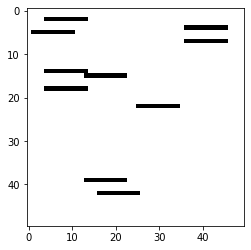

In [5]:
plt.imshow(img_horizontal, cmap='gray')

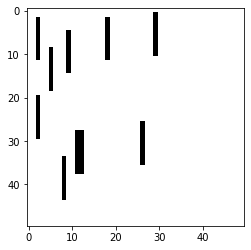

In [6]:
plt.imshow(img_vertical, cmap='gray')

In [27]:
# generate training data
imgs_x_train = []
imgs_y_train = []
imgs_x_vald = []
imgs_y_vald = []

for i in range(1000):
    imgs_x_train.append(generateImage(10, 50, 10, True))
    imgs_y_train.append([0,1])
    imgs_x_train.append(generateImage(10, 50, 10, False))
    imgs_y_train.append([1,0])

    imgs_x_vald.append(generateImage(10, 50, 10, True))
    imgs_y_vald.append([0,1])
    imgs_x_vald.append(generateImage(10, 50, 10, False))
    imgs_y_vald.append([1,0])

imgs_x_train = np.asarray(imgs_x_train)
imgs_x_vald = np.asarray(imgs_x_vald)

imgs_x_train = np.reshape(imgs_x_train, (2000, 50, 50, 1))
imgs_x_vald = np.reshape(imgs_x_vald, (2000, 50, 50, 1))

imgs_y_train = np.asarray(imgs_y_train)
imgs_y_vald = np.asarray(imgs_y_vald)

## b) Build the simplest possible CNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
from keras.layers.pooling import *

In [26]:
model = Sequential()#add model layers
model.add(Conv2D(1, kernel_size=5, activation="relu", input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(46,46), strides=46, padding='valid'))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 1)         26        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(imgs_x_train, imgs_y_train, validation_data=(imgs_x_vald, imgs_y_vald), epochs=20)

Epoch 1/20
63/63 [==============================] - 1s 20ms/step - loss: 2.4444 - accuracy: 0.6420 - val_loss: 0.5441 - val_accuracy: 0.8140
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.5200 - accuracy: 0.7905 - val_loss: 0.4919 - val_accuracy: 0.8210
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4927 - accuracy: 0.8125 - val_loss: 0.4761 - val_accuracy: 0.8300
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4787 - accuracy: 0.8175 - val_loss: 0.4624 - val_accuracy: 0.8300
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4657 - accuracy: 0.8210 - val_loss: 0.4488 - val_accuracy: 0.8405
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4523 - accuracy: 0.8250 - val_loss: 0.4327 - val_accuracy: 0.8425
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4235 - accuracy: 0.8605 - val_loss: 0.3658 - val_accuracy: 0.9510
Epoch 8/20
63

Plot Epochs vs Training

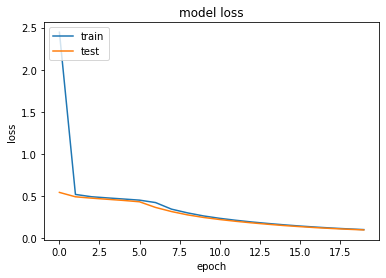

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot Epochs vs Accuracy

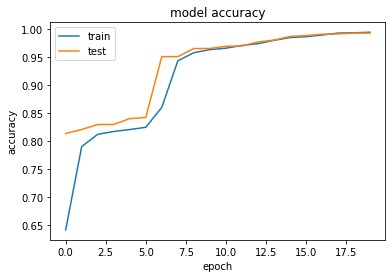

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Kernel darstellung

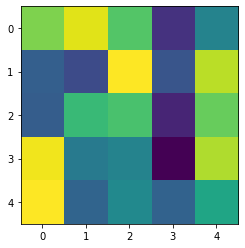

In [31]:
kernel = model.get_weights()[0]
kernel = kernel.reshape((5, 5))
plt.imshow(kernel)

In [32]:
print(kernel)

[[ 0.13801564  0.24869598  0.08254636 -0.35353574 -0.12871404]
 [-0.2356799  -0.2904223   0.28292742 -0.26630613  0.20462044]
 [-0.24256472  0.04328334  0.06785922 -0.3852754   0.11081465]
 [ 0.2674102  -0.15669377 -0.12924139 -0.46143076  0.1933629 ]
 [ 0.28116083 -0.22120118 -0.10791092 -0.22605576 -0.02521766]]
